In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import random
import math

def generate(x,par):
    y = []
    for i in range(len(x)):
        #print (x[i][0],x[i][1],x[i][2])
        y_offset = -5.0 + 10.0*random.random()
        #print (y_offset)
        y.append(par[0]+par[1]*x[i][0]+par[2]*x[i][1]+par[3]*x[i][2] + y_offset )
    return y

random.seed(1)
nsteps = 500
##### The following is where I was being an idiot!!! x1, x2, and x3 are perfectly correlated - BAD!!!
#x1 = np.linspace(0,63,nsteps)
#x2 = np.linspace(-30,30,nsteps)
#x3 = np.linspace(40,52,nsteps)
##### 
##### Choose x1, x2, x3 randomly on some interval - totally uncorrelated with one another!
x1l = 0
x1h = 63
x2l = -30
x2h = 30
x3l = 40
x3h = 52
x1 = []
x2 = []
x3 = []
for i in range(nsteps):
    x1.append(x1l + (x1h-x1l)*random.random())
    x2.append(x2l + (x2h-x2l)*random.random())
    x3.append(x3l + (x3h-x3l)*random.random())
    
x = []
for i in range(nsteps):
    x.append([x1[i],x2[i],x3[i]])
x = np.array(x)

#print (x)

#### Choose linear parameters ####
par =[20.4,2.040,-0.380,0.821]
##################################
y = generate(x,par)
y = np.array(y)

#x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
#y = [4, 5, 20, 14, 32, 22, 38, 43]
#x, y = np.array(x), np.array(y)

In [2]:
model = LinearRegression().fit(x, y)

In [3]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9934814588485255
intercept: 19.147830147490097
slope: [ 2.03823153 -0.37699183  0.84535623]


In [4]:
y_pred = model.predict(x)
print (y,y_pred)

[ 73.84680721  95.31276137 134.5447048   49.24264884 165.1027585
 165.7272111  183.63854185 112.89788716  82.56144988  86.67214222
  93.96238382 112.60002961 164.08101658  76.8726726   83.56809351
 134.25638247 159.90554126 130.00816073 120.21914228  80.98374036
  86.01915393 144.08059789 113.5143921  100.60796012  64.74547811
 129.80458547 112.05351429 113.62744325 110.19904882 127.5307304
 193.58824145 161.81955221 164.56763303 123.89059541 142.63794845
 117.33084388 130.48016518 120.46790956  80.10527591 157.64466117
  79.98189992  77.74726808 152.9832859  140.94245154  70.13840691
  88.25201066  92.54890546 104.46357714  63.03269768  84.46683995
  67.27097389 161.84762527 138.50570648 173.73787065  84.2736506
 135.50904558  79.25218277 177.89853097  90.18070086 107.68794446
 179.98775047 173.03715637 162.15746397 126.4861616   84.5012125
  93.09296388  96.57783277 154.76240504  88.44617413 158.80189555
 143.42153544  98.52466094 111.26970168 160.93963251 184.97943161
 126.73128464 

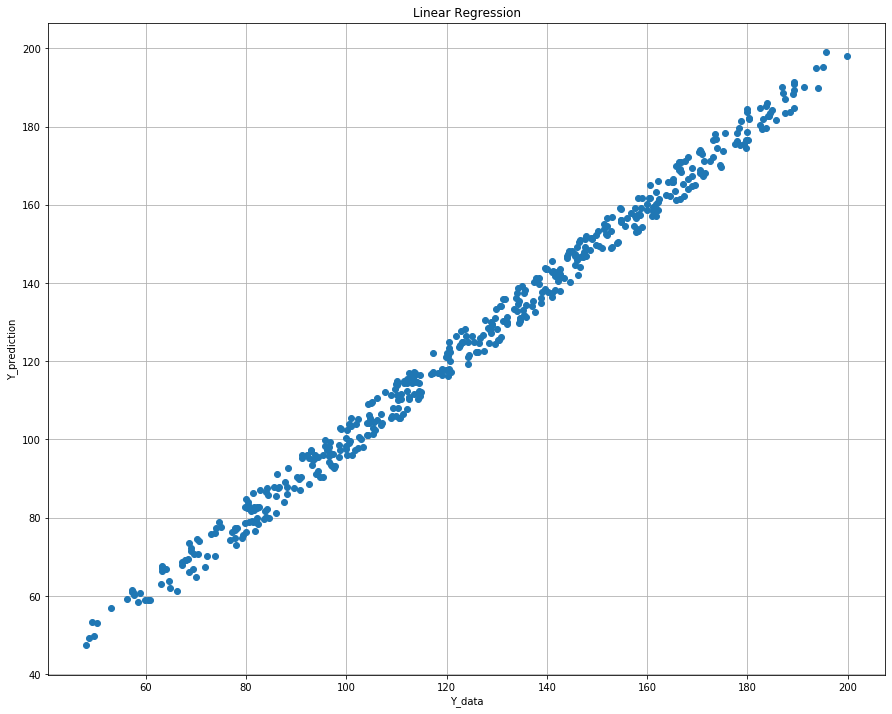

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title('Linear Regression')
ax1.set_xlabel('Y_data')
ax1.set_ylabel('Y_prediction')
ax1.grid(True)

ax1.plot(y,y_pred,'o')